In [1]:
import rospy
from sensor_msgs.msg import Image
from cv_bridge import CvBridge, CvBridgeError

bridge = CvBridge()

In [2]:
rospy.init_node('turtlebot_camera',anonymous = True)

In [3]:
def callback_color(msg):
    global color_img
    global color_timestamp
    color_timestamp = msg.header.stamp
    color_img = bridge.imgmsg_to_cv2(msg, "rgb8")

In [4]:
def callback_depth(msg):
    global depth_img
    global depth_timestamp
    depth_timestamp = msg.header.stamp
    depth_img = bridge.imgmsg_to_cv2(msg, "32FC1")

In [5]:
subscriber_color = rospy.Subscriber("/camera/rgb/image_rect_color", Image, callback_color)
subscriber_depth = rospy.Subscriber("/camera/depth/image_rect", Image, callback_depth)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

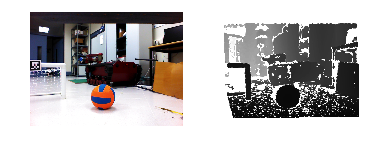

In [46]:
plt.subplot(121);
plt.imshow(color_img);
plt.axis('off');
plt.subplot(122);
plt.imshow(depth_img, cmap='gray');
plt.axis('off');

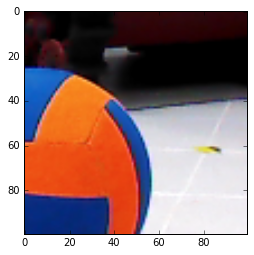

In [34]:
plt.imshow(color_img[280:380,300:400,:]);

In [35]:




color_img[340,320,:]

array([240,  91,  23], dtype=uint8)

In [36]:
import numpy as np
import cv2


In [37]:
lower_blue = (0,0,120)
upper_blue = (100,100,255)
lower_red = (200,0,0)
upper_red = (255,100,100)

In [38]:
mask_blue = cv2.inRange(color_img, lower_blue, upper_blue)
mask_red = cv2.inRange(color_img, lower_red, upper_red)

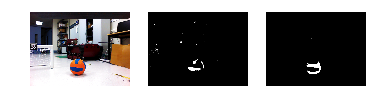

In [39]:
plt.subplot(131); plt.imshow(color_img);plt.axis('off');
plt.subplot(132); plt.imshow(mask_blue,cmap='gray'); plt.axis('off');
plt.subplot(133); plt.imshow(mask_red,cmap='gray'); plt.axis('off');

In [40]:
kernel = np.ones((5,5),np.uint8)
erosion_blue = cv2.erode(mask_blue,kernel,iterations = 1)
dilation_blue = cv2.dilate(erosion_blue,kernel,iterations = 3)
erosion_red = cv2.erode(mask_red,kernel,iterations = 1)
dilation_red = cv2.dilate(erosion_red,kernel,iterations = 3)
mask = cv2.bitwise_or(dilation_blue, dilation_red)

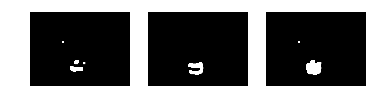

In [41]:
plt.subplot(131); plt.imshow(dilation_blue,cmap='gray'); plt.axis('off');
plt.subplot(132); plt.imshow(dilation_red,cmap='gray'); plt.axis('off');
plt.subplot(133); plt.imshow(mask,cmap='gray'); plt.axis('off');

In [42]:
im, cnt, hrc = cv2.findContours(mask,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnt.sort(key=cv2.contourArea, reverse=True)

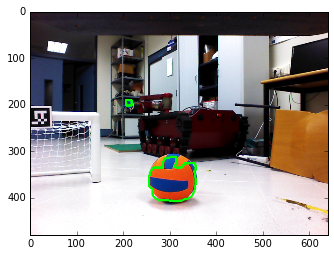

In [43]:
img = color_img.copy()
cv2.drawContours(img, cnt, -1, (0,255,0), 3)
plt.imshow(img);

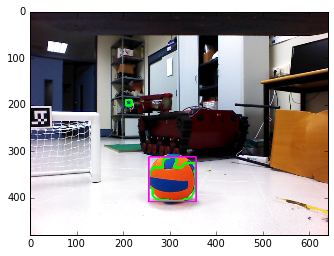

In [44]:
x, y, w, h = cv2.boundingRect( cnt[0] )
cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,255), 2)
plt.imshow(img);

In [45]:
np.nanmean(depth_img[y:y+h,x:x+w])

1.0555927

In [48]:
depth_img[y+h/2,x+w/2]

0.95900005